# **Download and load the dataset**

In [ ]:
# Importing required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string
nltk.download('stopwords')

from collections import Counter
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import gdown

# Define the file ID
file_id = '1x3o0pYEoJwqH2ThZItdfVHgc-DAiWtaD'

# Define the URL to download the file
url = f'https://drive.google.com/uc?id={file_id}'

# Define the output file name
output_file = 'news.csv'

# Download the file
gdown.download(url, output_file, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1x3o0pYEoJwqH2ThZItdfVHgc-DAiWtaD
To: /content/news.csv
100%|██████████| 30.7M/30.7M [00:00<00:00, 56.3MB/s]


'news.csv'

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('news.csv')

# Display the first few rows of the DataFrame
print(data.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


# **Exploratory data analysis**

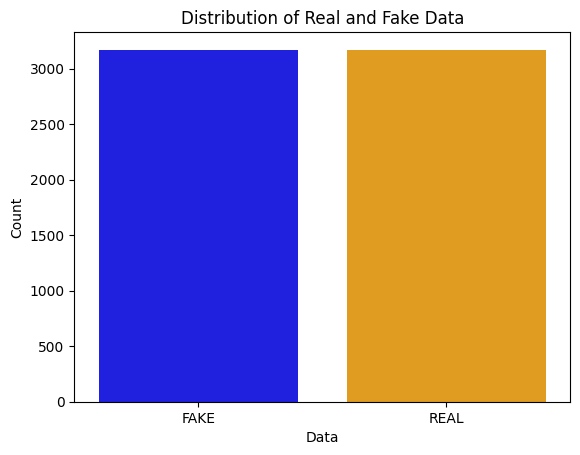

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('news.csv')

# Define colors for real and fake bars
colors = ["blue", "orange"]

# Plot the distribution with specified colors
sns.countplot(data=data, x='label', palette=colors, hue='label', legend=False)
plt.xlabel('Data')
plt.ylabel('Count')
plt.title('Distribution of Real and Fake Data')

# Show the plot
plt.show()


In [ ]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

# **Preprocessing datasets**

In [ ]:
#verifying if there are any null values in the dataset
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
import re
from nltk.corpus import stopwords
import string

# Initialize stopwords set and special characters to remove
stop_words = set(stopwords.words('english'))
special_characters = set(string.punctuation + string.digits)
to_remove = special_characters.union(stop_words)

def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove special characters, digits, and stopwords
        text = " ".join([word for word in text.split() if word not in to_remove])

    return text


# Test the preprocessing function
example_text = "This is an  example text with some stopwords and special characters ! It also contains a URL : https://example.com"
print("Original Text:")
print(example_text)
print("\nPreprocessed Text:")
print(preprocess_text(example_text))

Original Text:
This is an  example text with some stopwords and special characters ! It also contains a URL : https://example.com

Preprocessed Text:
example text stopwords special characters also contains url


In [ ]:
data['text'] = data['text'].apply(preprocess_text)
data['title'] = data['title'].apply(preprocess_text)

# Save the preprocessed dataset to a new CSV file
data.to_csv('preprocessed_news.csv', index=False)

# Display the preprocessed dataset
print(data.head())

   Unnamed: 0                                              title  \
0        8476                               smell hillary’s fear   
1       10294  watch exact moment paul ryan committed politic...   
2        3608                    kerry go paris gesture sympathy   
3       10142  bernie supporters twitter erupt anger dnc: 'we...   
4         875                   battle new york: primary matters   

                                                text label  
0  daniel greenfield, shillman journalism fellow ...  FAKE  
1  google pinterest digg linkedin reddit stumbleu...  FAKE  
2  u.s. secretary state john f. kerry said monday...  REAL  
3  — kaydee king (@kaydeeking) november 9, 2016 l...  FAKE  
4  primary day new york front-runners hillary cli...  REAL  


# **Wordcloud**

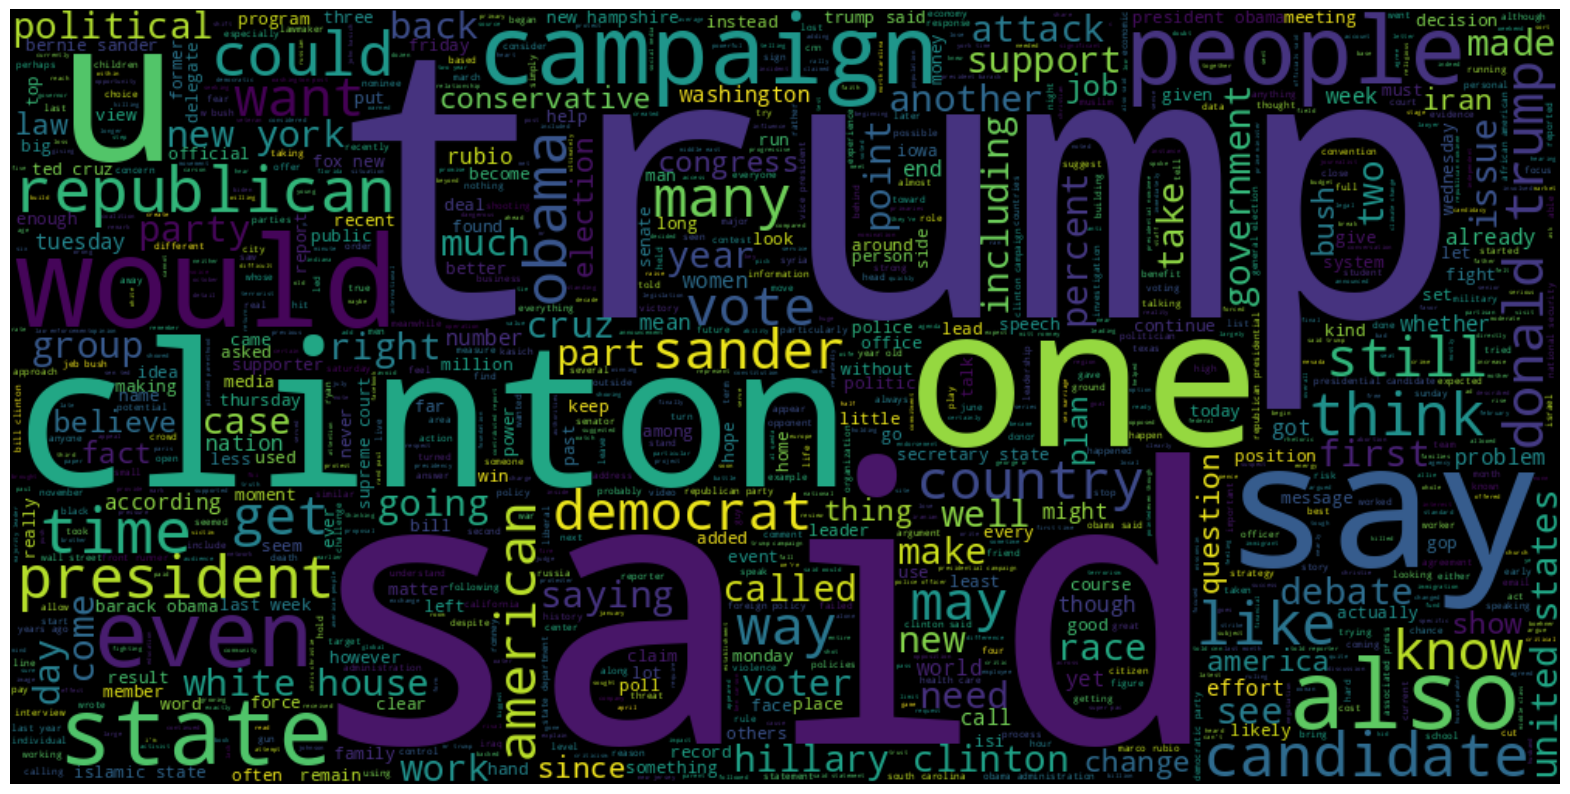

In [ ]:
# Load the preprocessed dataset
data = pd.read_csv('preprocessed_news.csv')

# Combine all text from real data
real_text = " ".join(data[data['label'] == 'REAL']['text'])

# Create a WordCloud object
wc = WordCloud(max_words=1500, width=1000, height=500, stopwords=set(stopwords.words('english')))

# Generate the word cloud
wc.generate(real_text)

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


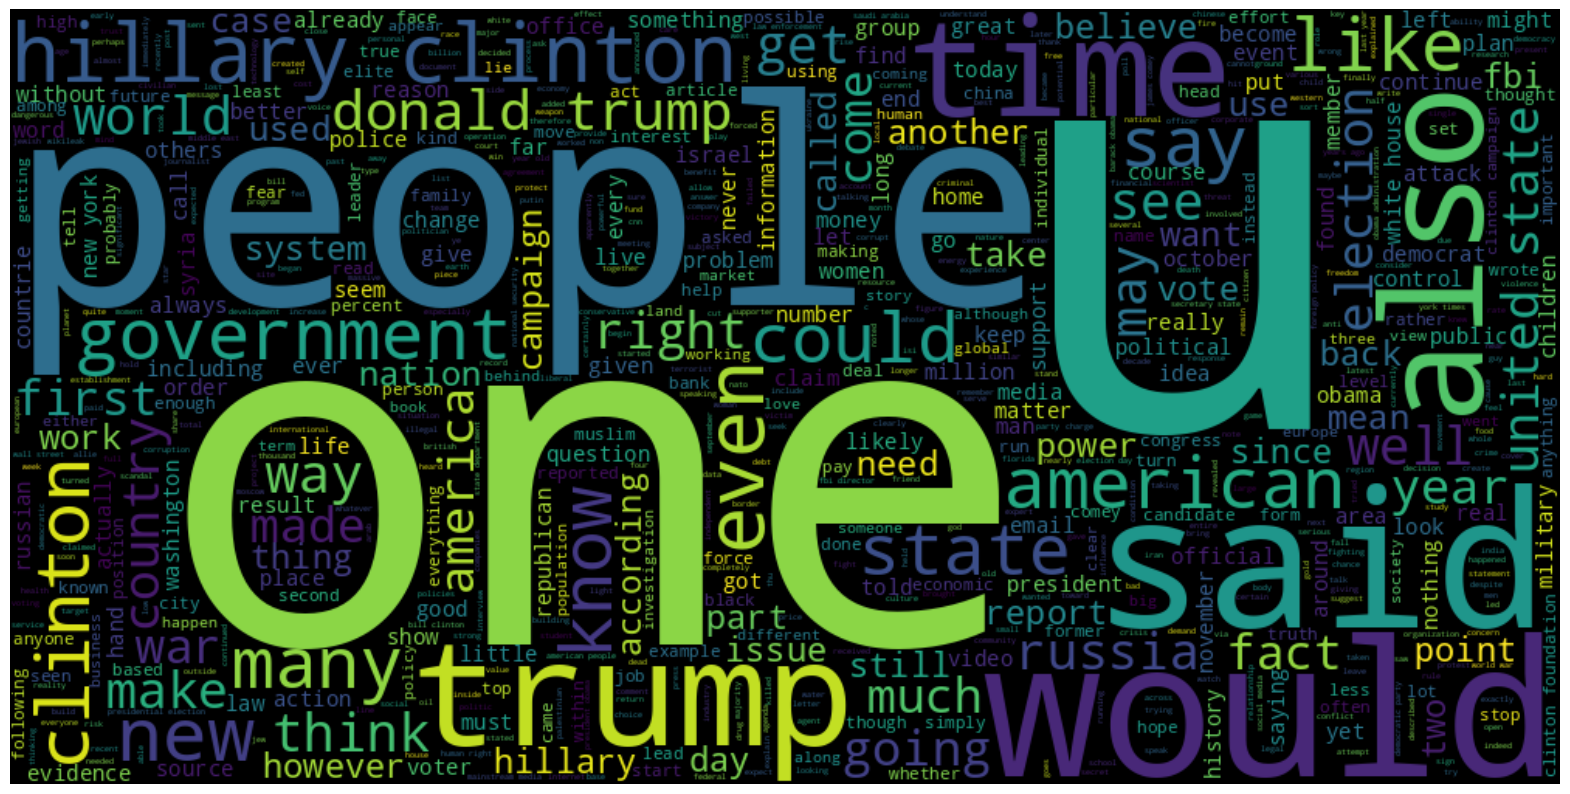

In [ ]:
# Convert all values in the 'text' column to strings
data['text'] = data['text'].astype(str)

# Combine all text from fake data
fake_text = " ".join(data[data['label'] == 'FAKE']['text'])

# Create a WordCloud object
wc = WordCloud(max_words=1500, width=1000, height=500, stopwords=set(stopwords.words('english')))

# Generate the word cloud
wc.generate(fake_text)

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


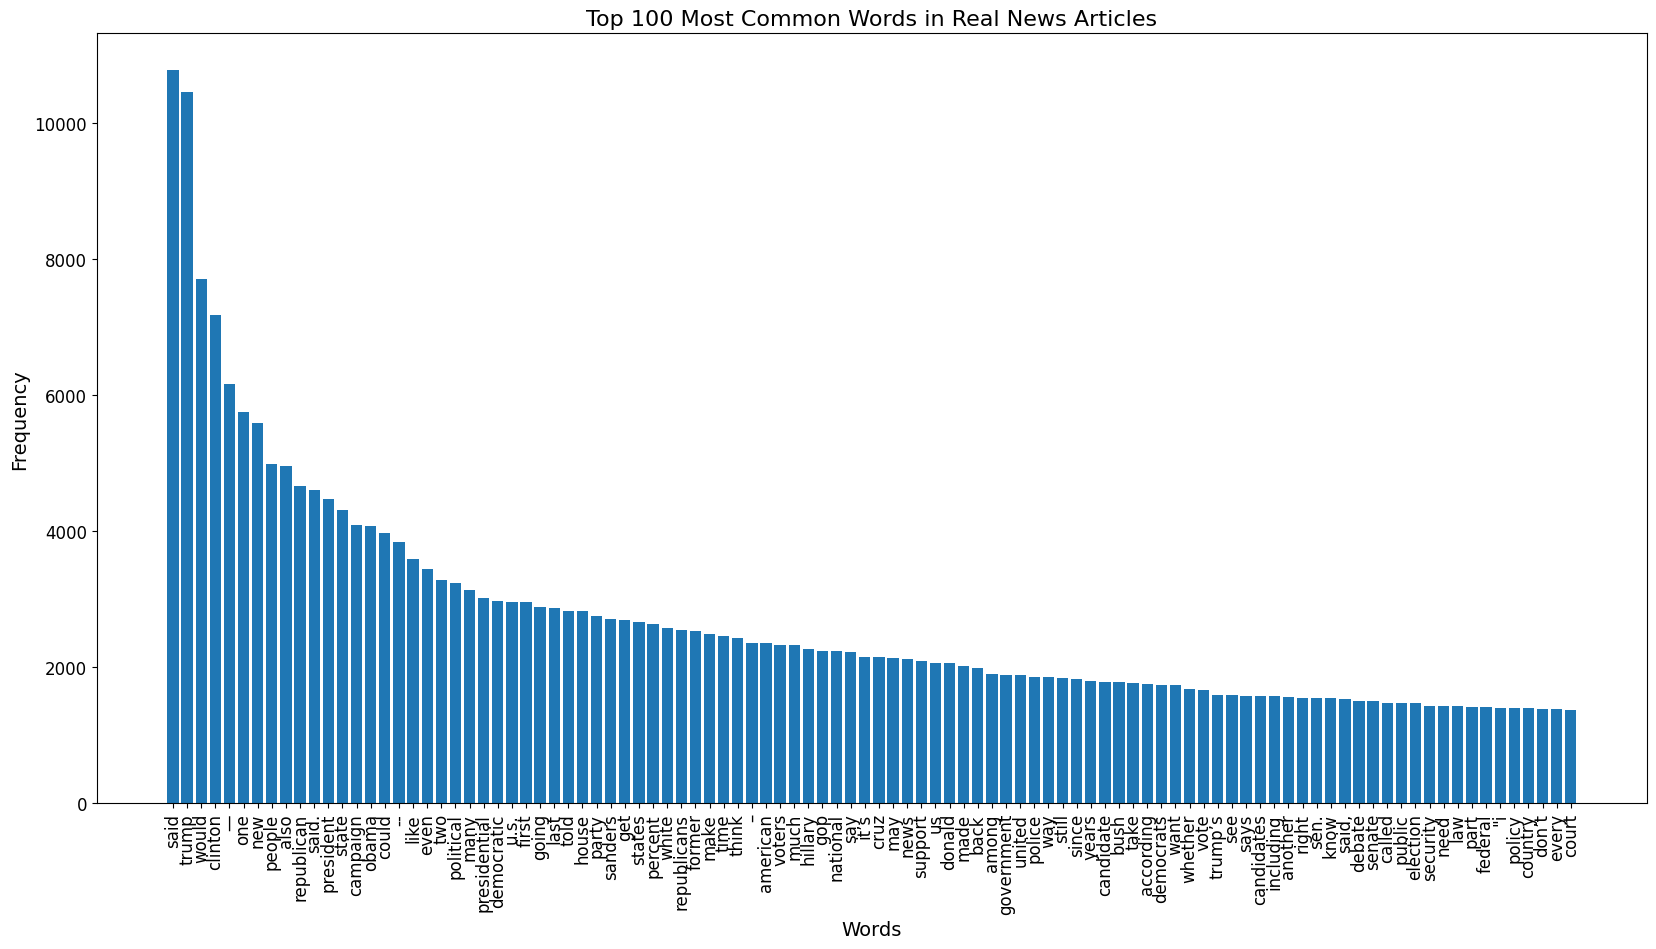

In [ ]:
# Combine all text from real data
real_text = " ".join(data[data['label'] == 'REAL']['text'])

# Count the most common words in real news articles
real_words_count = Counter(real_text.split())
real_common_words = real_words_count.most_common(100)

# Extract the words and their counts
real_words = [word for word, count in real_common_words]
real_words_count = [count for word, count in real_common_words]

# Plot the top 100 most common words in real news articles
plt.figure(figsize=(20, 10))
plt.bar(real_words, real_words_count)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 100 Most Common Words in Real News Articles", fontsize=16)
plt.show()

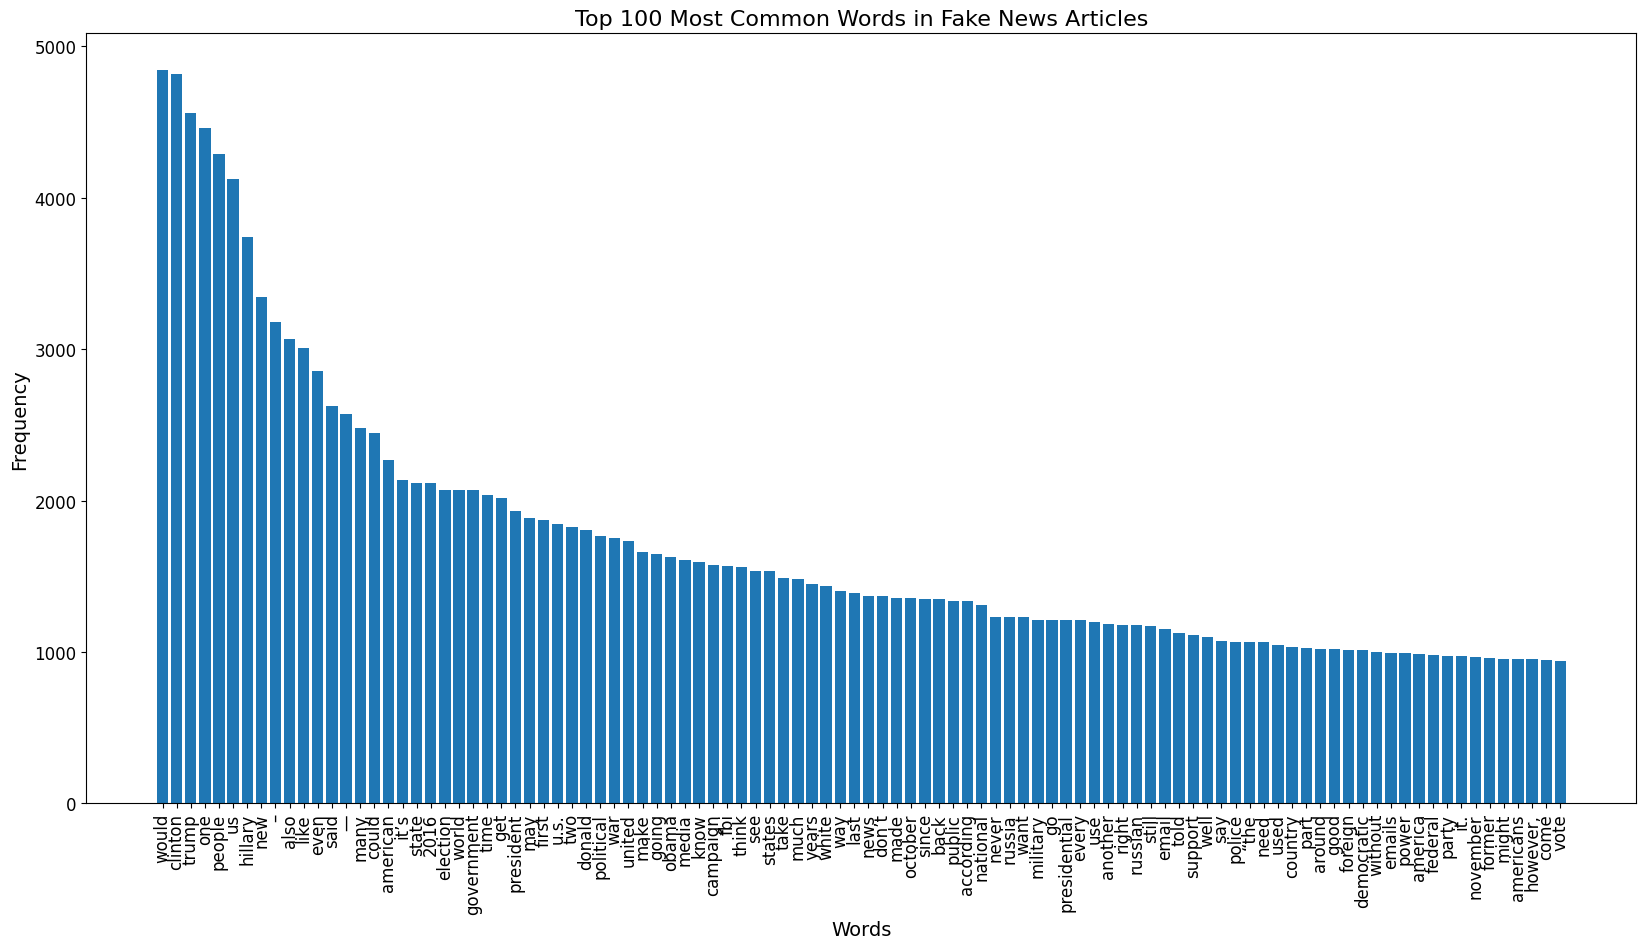

In [ ]:
# Combine all text from fake data
fake_text = " ".join(data[data['label'] == 'FAKE']['text'])

# Count the most common words in fake news articles
fake_words_count = Counter(fake_text.split())
fake_common_words = fake_words_count.most_common(100)

# Extract the words and their counts
fake_words = [word for word, count in fake_common_words]
fake_words_count = [count for word, count in fake_common_words]

# Plot the top 100 most common words in fake news articles
plt.figure(figsize=(20, 10))
plt.bar(fake_words, fake_words_count)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 100 Most Common Words in Fake News Articles", fontsize=16)
plt.show()


# **Feature Engineering**

Classifier: Logistic Regression
Accuracy: 0.926984126984127
Confusion Matrix:
[[587  38]
 [ 54 581]]



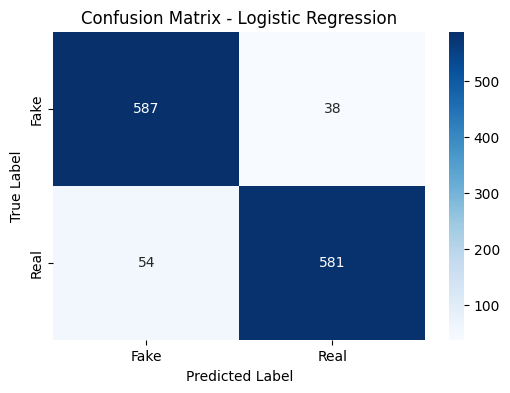

Classifier: Random Forest
Accuracy: 0.9142857142857143
Confusion Matrix:
[[581  44]
 [ 64 571]]



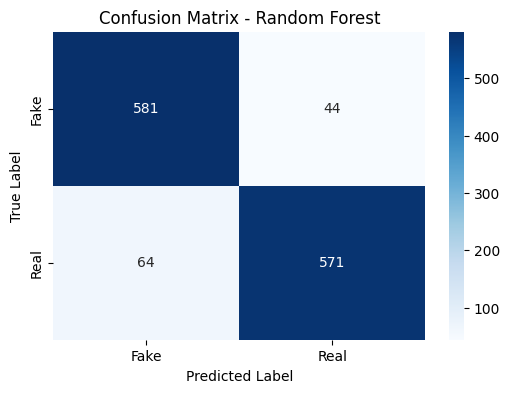

Classifier: KNN
Accuracy: 0.8777777777777778
Confusion Matrix:
[[534  91]
 [ 63 572]]



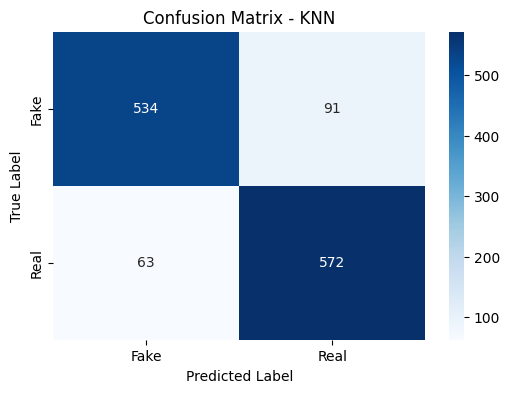

Classifier: Decision Tree
Accuracy: 0.8095238095238095
Confusion Matrix:
[[498 127]
 [113 522]]



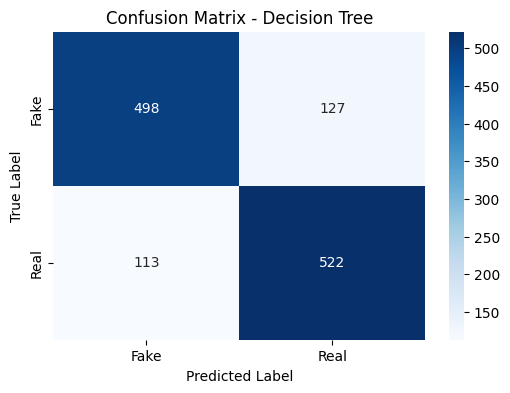

Classifier: Naive Bayes
Accuracy: 0.8777777777777778
Confusion Matrix:
[[556  69]
 [ 85 550]]



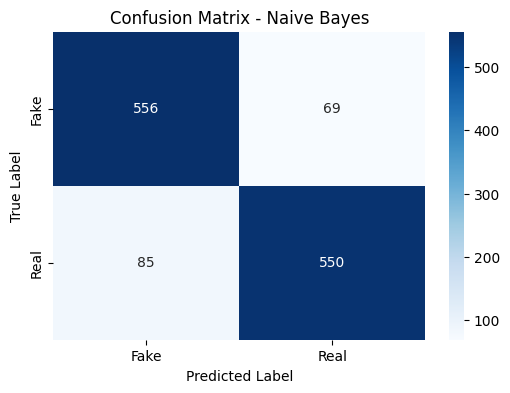

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
data = pd.read_csv('preprocessed_news.csv')

# Drop rows with missing values in the 'text' column
data.dropna(subset=['text'], inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data['text']
y = data['label']

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{cm}\n")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


Classifier: Logistic Regression
Accuracy: 0.926984126984127
Confusion Matrix:
[[587  38]
 [ 54 581]]

Classifier: Random Forest
Accuracy: 0.9158730158730158
Confusion Matrix:
[[580  45]
 [ 61 574]]

Classifier: KNN
Accuracy: 0.8777777777777778
Confusion Matrix:
[[534  91]
 [ 63 572]]

Classifier: Decision Tree
Accuracy: 0.8007936507936508
Confusion Matrix:
[[495 130]
 [121 514]]

Classifier: Naive Bayes
Accuracy: 0.8777777777777778
Confusion Matrix:
[[556  69]
 [ 85 550]]



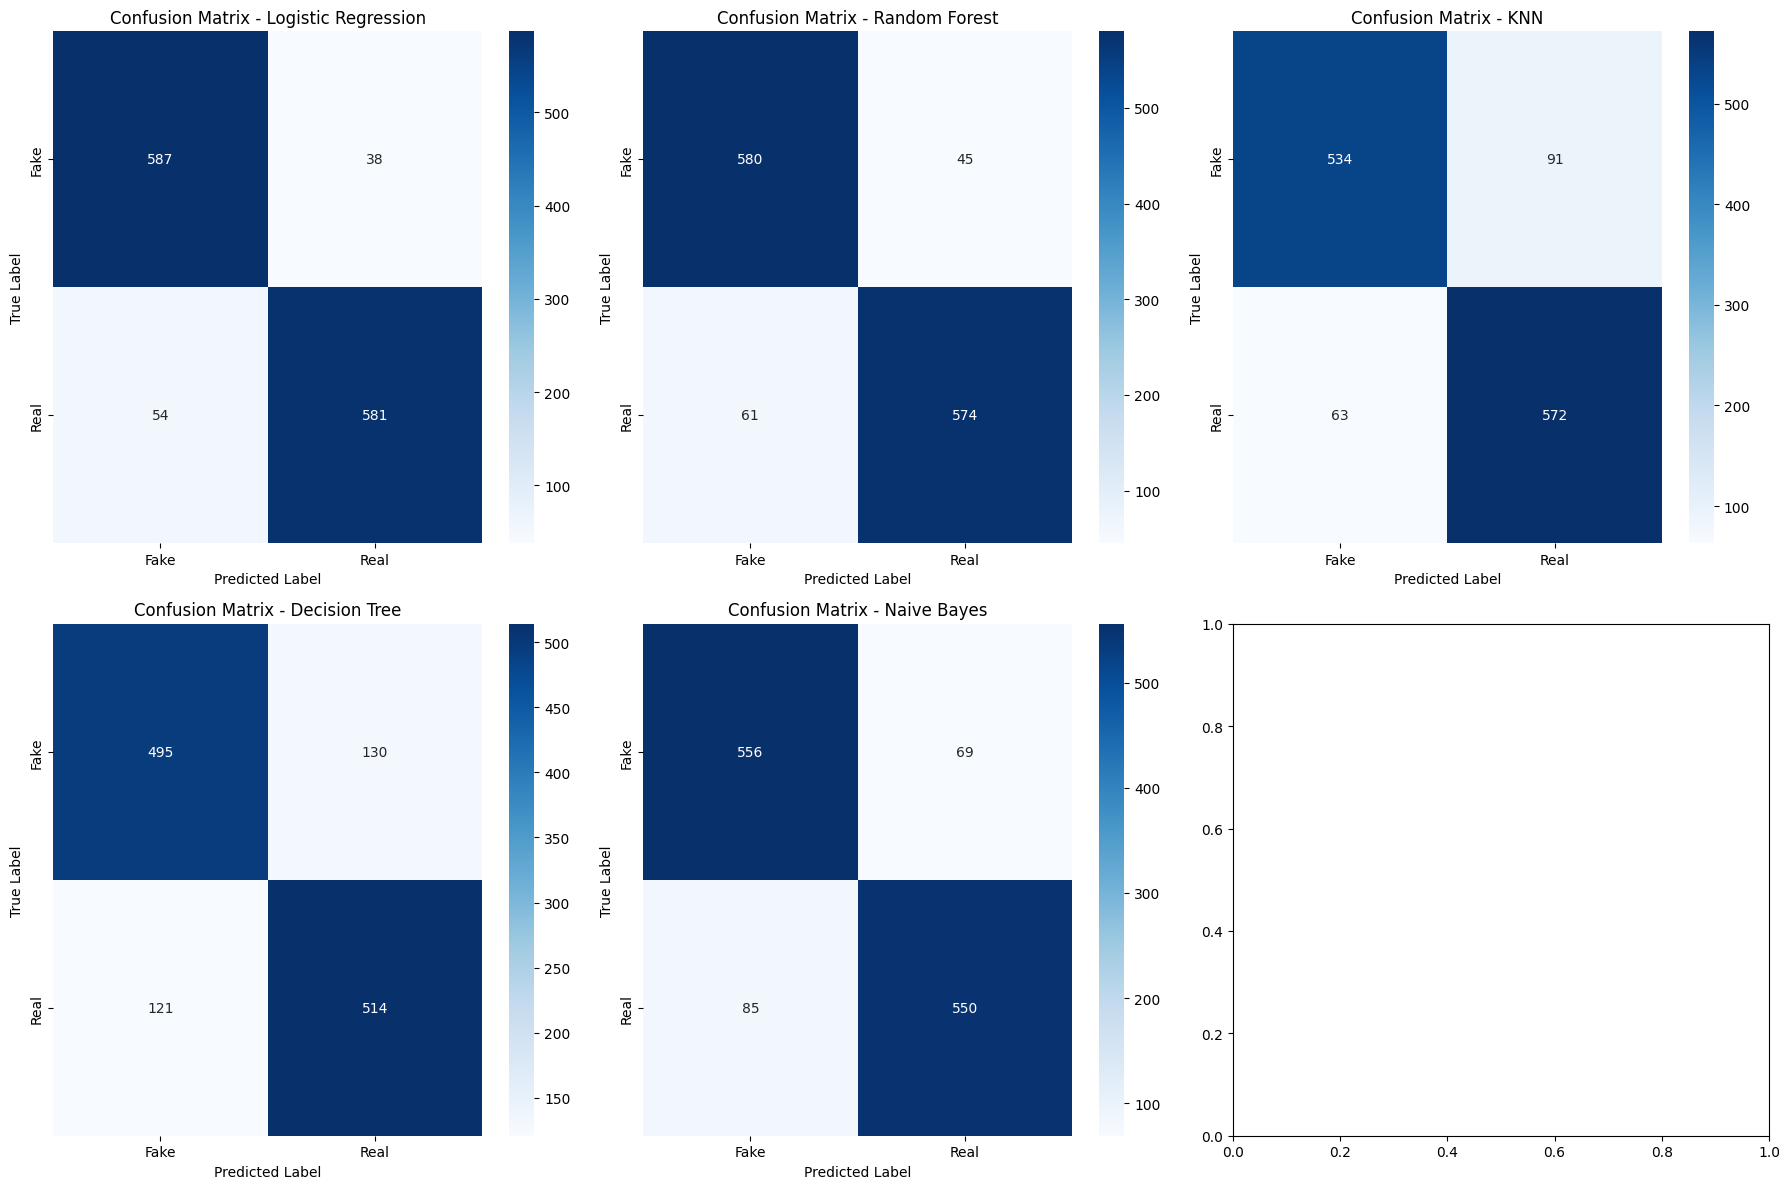

In [ ]:
# Train and evaluate each classifier
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, (name, clf) in enumerate(classifiers.items()):
    row = i // 3
    col = i % 3

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{cm}\n")

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'], ax=axs[row, col])
    axs[row, col].set_xlabel('Predicted Label')
    axs[row, col].set_ylabel('True Label')
    axs[row, col].set_title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()

# **Predicting statements**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Load the preprocessed dataset
data = pd.read_csv('preprocessed_news.csv')

# Drop rows with missing values in the 'text' column
data.dropna(subset=['text'], inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data['text']
y = data['label']

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train the Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_tfidf, y)

# Save the trained classifier
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

# Take input from the user
statement = input("Enter a statement to predict: ")

# Preprocess the statement
statement_tfidf = tfidf_vectorizer.transform([statement])

# Predict using the trained classifier
prediction = classifier.predict(statement_tfidf)
print("Predicted label:", prediction[0])


Enter a statement to predict: killing obama administration rules, dismantling obamacare pushing tax reform early to-do list.
Predicted label: REAL
